In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import inverse_kinematics_objective, draw_solutions
from idea import IDEA

In [3]:
rectangles = [((0.5, 4.), (2., 5.5))]
target_x = 1.2
target_y = 8.
S = [1.] * 15 + [0.3] * 5
d = len(S)
x_min = -np.pi
x_max = np.pi

objective = inverse_kinematics_objective(S, (target_x, target_y), rectangles)
n_constraints = len(rectangles)

n = 600
n_inf = int(0.1*n)
eta_c = 5.
eta_m = 40.
p_c = 0.9
p_m = 0.05
num_iterations = 2400

populations, scores = IDEA(objective, n_constraints, x_min, x_max, d, n, n_inf, eta_c, eta_m, p_c, p_m, num_iterations, log_interval=100)

Iteration 0, #feasible: 540, #infeasible: 60, scores: [1.30068217 0.        ] [81.37490327  1.69333333] [238.53363139  32.        ]
Iteration 100, #feasible: 540, #infeasible: 60, scores: [0.01081096 0.        ] [256.29238079   2.93      ] [528.67051006  62.        ]
Iteration 200, #feasible: 540, #infeasible: 60, scores: [0.00740127 0.        ] [273.66542803   3.04      ] [551.71362323  70.        ]
Iteration 300, #feasible: 540, #infeasible: 60, scores: [0.00018987 0.        ] [279.51640369   3.21666667] [563.97621107  70.        ]
Iteration 400, #feasible: 540, #infeasible: 60, scores: [0.00018987 0.        ] [285.51647424   3.09666667] [564.90653742  70.        ]
Iteration 500, #feasible: 540, #infeasible: 60, scores: [0.00018987 0.        ] [280.64281679   3.435     ] [569.33126822  73.        ]
Iteration 600, #feasible: 540, #infeasible: 60, scores: [0.00018987 0.        ] [290.94176314   3.655     ] [571.04664016  78.        ]
Iteration 700, #feasible: 540, #infeasible: 60, scor

In [4]:
scores[-1, scores[-1, :, 1] == 0., 0].min()

0.00020287487525616688

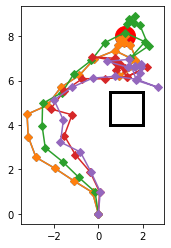

In [9]:
mask = scores[-1, :, 1] == 0.
feasible_population = populations[-1][mask, :]
best = np.argsort(scores[-1, mask, 0])[:5]
draw_solutions(feasible_population[best, :], S, target_x, target_y, rectangles)

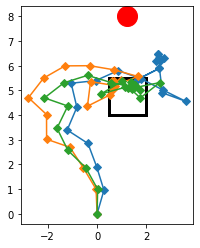

In [6]:
mask = scores[-1, :, 1] > 0.
feasible_population = populations[-1][mask, :]
best = np.argsort(scores[-1, mask, 0])[:3]
draw_solutions(feasible_population[best, :], S, target_x, target_y, rectangles)

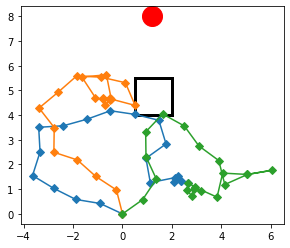

In [7]:
mask = scores[-1, :, 1] > 0.
feasible_population = populations[-1][mask, :]
best = np.argsort(scores[-1, mask, 1])[:3]
draw_solutions(feasible_population[best, :], S, target_x, target_y, rectangles)